In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math 
from datetime import datetime as dt

#### Load the Netflix dataset

In [2]:
df1=pd.read_csv('netflix.csv')
df=df1.copy()

## A. BASIC DATA EXPLORATION

#### 1. Shape of dataset
* There are 8807 rows and 12 columns in the given Netflix data.

In [3]:
df.shape

(8807, 12)

#### 2. Top 5-Rows

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### 3. Bottom 5-Rows

In [5]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


#### 4. Names of all columns in the dataset

In [6]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

#### 5. Range of Indices

In [7]:
df.index

RangeIndex(start=0, stop=8807, step=1)

#### 6. Checking statistical properties of Numerical data

In [8]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


#### 7. Checking number of unique 'release_year'
*There is total 74 unique ‘release_year’ data.
* Dataset contains the movie/programme details released during 1925 and 2021.
* Last data was recorded in 2021.

In [9]:
df.sort_values('release_year')['release_year'].unique()

array([1925, 1942, 1943, 1944, 1945, 1946, 1947, 1954, 1955, 1956, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [10]:
len(df.sort_values('release_year')['release_year'].unique())

74

#### 8. Checking duplicate rows
* No duplicate row is present

In [11]:
df.loc[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


#### 9. Checking data information
* There is total 12 columns.
* All the column’s data types are of object type except ‘release_year’ which is integer type.
* Column named ‘director’ ,  ‘cast’ , ‘country’, ‘date_added’, ‘rating’, ‘duration’ has some missing values.
* Range of indices [0,8806]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### 10. Count of Missing values in each column’s
*column ‘director’ has maximum null/missing values.

In [13]:
df.isna().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

#### 11. Percentage of Null Values
*column ‘director’ has maximum missing values %.

In [14]:
round(df.isna().sum()/df.shape[0]*100,2).sort_values(ascending=False)

director        29.91
country          9.44
cast             9.37
date_added       0.11
rating           0.05
duration         0.03
show_id          0.00
type             0.00
title            0.00
release_year     0.00
listed_in        0.00
description      0.00
dtype: float64

# B. Handling Missing Values

In [15]:
df.isna().sum().sort_values(ascending=False) #Count of Null-values

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

### 1. Handling missing values in 'duration' column

In [16]:
df['duration'].isna().sum() # 'Duration' column has 3 null values

3

In [17]:
df.loc[df['duration'].isna()] 
#Locating 3 rows where null values is present
# It can be seen that duration values are present in rating column

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [18]:
df['duration'].fillna(df['rating'], inplace=True)
# Replace Null-values of 'duration' column with 
# values of corresponding rating column

**Converting duration into numerical formats

In [19]:
df['duration']=df['duration'].str.extract("(\d+)").astype(float)

In [20]:
df['duration'].isna().sum() #Sum of null values in duration column is zero

0

In [21]:
df.isna().sum().sort_values(ascending=False) 
#Count of Null-values after filling null valeus in 'duration' column

director        2634
country          831
cast             825
date_added        10
rating             4
show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64

### 2. Handling missing values in 'rating' column

In [22]:
df['rating'].value_counts()
#there are 3 rows where instead of rating some duration is mentioned.

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [23]:
df.loc[(df['rating']=='74 min') | (df['rating']=='84 min') | (df['rating']=='66 min')]
#Locate the rows where rating is 74 min, 84 min, 66 min

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,74.0,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,84.0,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,66.0,Movies,The comic puts his trademark hilarious/thought...


In [24]:
df.loc[5541,'rating']='TV-MA'  
df.loc[5794,'rating']='TV-MA' 
df.loc[5813,'rating']='TV-MA'
#Since rating TV-MA has maximum count
# Replace the values of rating 74 min, 84 min, 66 min
# Replace with highest count of rating i.e. TV-MA

In [25]:
df.loc[[5541,5794,5813]]
#Checking whether rating has been changed or not
#Yes it changed

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,TV-MA,74.0,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,TV-MA,84.0,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,TV-MA,66.0,Movies,The comic puts his trademark hilarious/thought...


In [26]:
df['rating'].isna().sum() #Count of null values in 'rating' column

4

In [27]:
df.loc[df['rating'].isna()] #Locate rows where null rating values.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37.0,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1.0,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1.0,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115.0,Dramas,"Amid the chaos and horror of World War II, a c..."


In [28]:
df.loc[df['type']=='Movie','rating'].value_counts()
# Counts of ratings in Movie

rating
TV-MA       2065
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
NC-17          3
UR             3
Name: count, dtype: int64

In [29]:
df.loc[df['type']=='TV Show','rating'].value_counts()
# Counts of ratings in TV-Shows

rating
TV-MA       1145
TV-14        733
TV-PG        323
TV-Y7        195
TV-Y         176
TV-G          94
NR             5
R              2
TV-Y7-FV       1
Name: count, dtype: int64

In [30]:
df['rating'].fillna('TV-MA', inplace=True)
# It is noted that in both TV-Shows & Movies 
#TV-MA has the highest count of rating in both section
# Replace Null values in rating column with 'TV-MA' rating

In [31]:
df['rating'].isna().sum() ##Count of null values in 'rating' column is zero

0

In [32]:
df.isna().sum() 
#Count of Null values after filling null values 
#in duration and rating column
#Now date_added has 10 null values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

### 3. Handling missing values in 'date_added' column

**Create a copy of column named 'datetime_added' (since we dont want to hamper original data)
**Convert datetime_added to datetime format

In [33]:
df['datetime_added']=df['date_added']
df['datetime_added'] = df['datetime_added'].str.strip()
df['datetime_added'] = pd.to_datetime(df['datetime_added'], format="%B %d, %Y")

**Creating a new column 'year_added' from 'datetime_added' 

In [34]:
df['year_added'] = df['datetime_added'].dt.year

**Count of Null valeus in newly created 'year_added'

In [35]:
df['year_added'].isna().sum()

10

**Filling missing valeus in newly created column 'year_added' with corrseponding values from 'release_year' column
**Convert the float values of newly creater column 'year_added' into integer values

In [36]:
df['year_added'].fillna(df['release_year'],inplace=True)
df['datetime_added'].fillna(df['release_year'],inplace=True)
df['year_added'] = df['year_added'].astype(int)

In [37]:
df['year_added'].dtype

dtype('int32')

**Count of Null valeus in newly created 'year_added'**

In [38]:
df['year_added'].isna().sum()

0

*Handling Missing values in 'date_added' column

In [39]:
df.loc[df['date_added'].isna()].head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,datetime_added,year_added
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2.0,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",2013,2013
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5.0,Docuseries,This CNN original series has chef Anthony Bour...,2018,2018
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11.0,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...,2003,2003
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10.0,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...,2003,2003
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2.0,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe...",2008,2008


In [40]:
df['date_added'].fillna(df['release_year'],inplace=True)
df['datetime_added'].fillna(df['release_year'],inplace=True)
#Fill the null values in 'date_added' columns with corresponding 'release_year'

In [41]:
df.loc[df['date_added'].isna()] 
#Acessing null rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,datetime_added,year_added


In [42]:
df.isna().sum()
# The missing values in date_added (10 rows), rating(4 rows), duration(7 rows) has been taken care.
# Since missing values in director, cast and country are large in numbers. 
# Hence replacing them would certainly affect the data.

show_id              0
type                 0
title                0
director          2634
cast               825
country            831
date_added           0
release_year         0
rating               0
duration             0
listed_in            0
description          0
datetime_added       0
year_added           0
dtype: int64

### 4. Replacing missing values in 'country' with 'Other'

In [43]:
df['country'].replace(np.NaN, 'Other', inplace=True)

### 5.Replacing missing values in 'cast' with 'Cast-Unknown'

In [44]:
df['cast'].replace(np.NaN, 'Cast-Unknown', inplace=True)

### 6. Replacing missing values in 'director' with 'Unknown'

In [45]:
df['director'].replace(np.NaN, 'Unknown', inplace=True)

### 7. Final count of missing values in each columns 

In [46]:
df.isna().sum()
##Thus shows that there are no missing values in any columns.
## All missing values have been taken careof.

show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
datetime_added    0
year_added        0
dtype: int64

In [47]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,datetime_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Cast-Unknown,United States,"September 25, 2021",2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25 00:00:00,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24 00:00:00,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Other,"September 24, 2021",2021,TV-MA,1.0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24 00:00:00,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Cast-Unknown,Other,"September 24, 2021",2021,TV-MA,1.0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24 00:00:00,2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2.0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24 00:00:00,2021


# C. NON-GRAPHICAL ANALYSIS

#### 1. Exploring 'type' column

In [48]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [49]:
df['type'].nunique()

2

In [50]:
df['type'].value_counts()
# There are two categories of Netflix shows types 1. Movie 2. TV-Shows
# Movies has count of 6131.
# TV-Shows has count of 2676

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

#### 2. Exploring 'director' column

In [51]:
df['director'].unique()

array(['Kirsten Johnson', 'Unknown', 'Julien Leclercq', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [52]:
df['director'].nunique()
#Since here count of unique director seems bit higher the reason bheind this 
# many group of different director's combination have been counted. 

4529

In [53]:
df['director'].value_counts()
# There are 4529 unique directors in the data in which 2634 directors are unknown.
# Considering the know director names, the top 4 directors who made maximum shows are
# :1. Rajiv Chilaka2. Raul Campos, Jan Suter3. Suhas Kadav4. Marcus Raboy

director
Unknown                           2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4529, dtype: int64

#### 3. Exploring 'country' column

In [54]:
df['country'].nunique()

749

In [55]:
df['country'].value_counts()
#There are 749 unique countries the reason for 749 countries 
#as many shows have been produced in multiple countries which have been counted multiple times.

# Maximum shows were produced in U.S.
# There are 829 shows whose country produced is not known and named as 'other'. 

country
United States                             2818
India                                      972
Other                                      831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64

#### 4. Exploring 'date_added' column

In [56]:
df['date_added'].value_counts()
#Maximum shows (109 shows) were added on Netflix on Jan 1,2020.

date_added
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
November 19, 2016      1
November 17, 2016      1
October 29, 2016       1
October 27, 2016       1
January 11, 2020       1
Name: count, Length: 1775, dtype: int64

#### 5. Exploring 'release_year' column

In [57]:
df['release_year'].nunique()
#There are unique 74 years in which Movie/TV-shows was released.

74

In [58]:
df['release_year'].value_counts()
# Maximum release in 2018 with count of 1147 Movie/TV-Shows

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

#### 6. Exploring 'rating' columns

In [59]:
df['rating'].nunique()
# There are total of 14 unique ratings on TV-Shows/Movies.

14

In [60]:
df['rating'].value_counts()
# Maximum number of times (3214 times) the show was rated as TV-MA.

rating
TV-MA       3214
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

#### 7. Exploring 'duration' column

In [61]:
df['duration'].nunique()
# There are total of 220 unique durations present in the dataset 
# including TV-Shows which are measured in seasons rather than duration.

210

In [62]:
df['duration'].value_counts().head()
# Maximum TV-Shows (1793 shows) are of 1 season only.
# Maximum number of movies (152 movies) are of 90 minutes.

duration
1.0     1793
2.0      425
3.0      200
90.0     152
94.0     146
Name: count, dtype: int64

# D. DATA-ANALYSIS

## Problem Statement 1: Top 10 Genres

In [63]:
data_genre=df.set_index('title')['listed_in'].str.split(',', expand=True).stack().reset_index(drop=True)

In [64]:
data_genre.value_counts().head()

 International Movies    2624
Dramas                   1600
Comedies                 1210
Action & Adventure        859
Documentaries             829
Name: count, dtype: int64

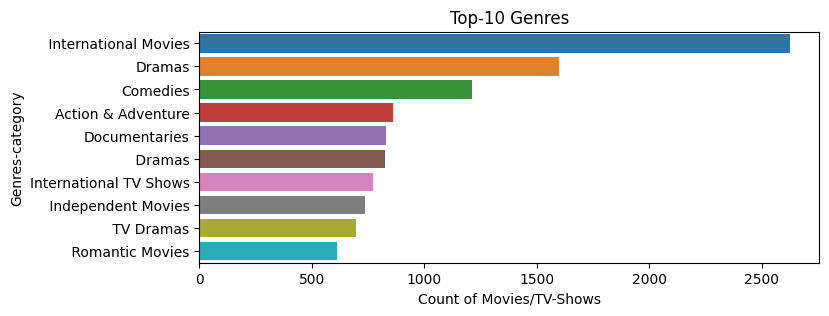

In [65]:
plt.figure(figsize=(8,3))
sns.countplot(y=data_genre, order=data_genre.value_counts().index[:10])
plt.title('Top-10 Genres')
plt.xlabel('Count of Movies/TV-Shows')
plt.ylabel('Genres-category')
plt.show()

**PS-1 Insights:
1. International Movies is the most popular genre
2. 'Dramas', 'Comedies', 'Action & Adventure', Documentaries are other popular genres on Netflix

## Problem Statement 2: Top-10 Directors

In [66]:
data_directors=df.set_index('title')['director'].str.split(',',expand=True).stack().reset_index(drop=True)
data_directors.value_counts().head(6)

Unknown          2634
Rajiv Chilaka      22
 Jan Suter         18
Raúl Campos        18
Marcus Raboy       16
Suhas Kadav        16
Name: count, dtype: int64

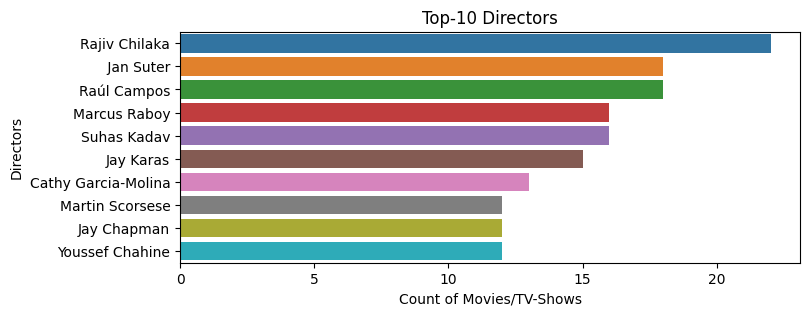

In [67]:
plt.figure(figsize=(8,3))
sns.countplot(y=data_directors, order=data_directors.value_counts().index[1:11])
plt.title('Top-10 Directors')
plt.xlabel('Count of Movies/TV-Shows')
plt.ylabel('Directors')
plt.show()

**PS-2 Insights:
1. Three famous directors are Rajiv Chilaka, Jan Suter, Raul Campos.
2. Maximum number of Movies/TV-Shows made by any directors is 22.

## Problem Statement 3: Comparison of TV Shows vs Movies 

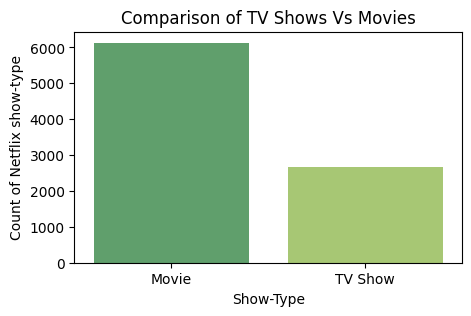

In [68]:
plt.figure(figsize=(5, 3))
sns.countplot(x=df['type'],palette='summer')
plt.ylabel('Count of Netflix show-type')
plt.xlabel('Show-Type')
plt.title('Comparison of TV Shows Vs Movies')
plt.show()

**PS-3 Insights:
1. There are 6131 Movies and 2676 TV-Shows present on Netflix.

## Problem Statement 4: Comparison of TV Shows vs Movies  in last 30 years

In [69]:
last30_release_data=df.loc[(df['release_year']>=1991) & (df['release_year']<=2021)]

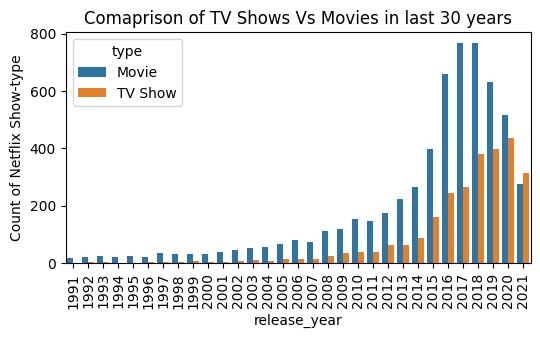

In [70]:
plt.figure(figsize=(6,3))
sns.countplot(data=last30_release_data, x='release_year', hue='type')
plt.xticks(rotation=90)
plt.ylabel('Count of Netflix Show-type')
plt.xlabel('release_year')
plt.title('Comaprison of TV Shows Vs Movies in last 30 years')
plt.show()

**PS-4 Insights:
1. In last 30 years, there are total 5877 Movie and 2657 TV-Shows.
2. Maximum Number of Movies are released in 2018.
3. maximum number of TV-Shows are released in 2020.
4. Number of Movies released through the last 30 years is increasing exponentially till 2018 and thereafter it starts decreasing.
5. Number of TV-Shows released through the last 30 years is increasing exponentially till 2020 and thereafter it starts decreasing.

### Problem Statement 5: No. of Movies/TV-Shows released through the years

1. KDE Plot

<Axes: xlabel='release_year', ylabel='Density'>

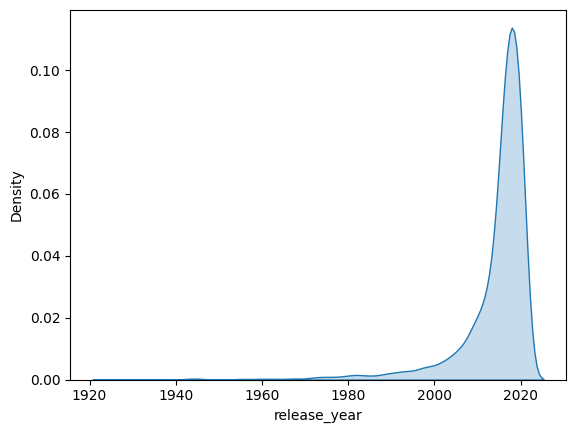

In [71]:
sns.kdeplot(df, x='release_year', fill=True)

**PS-5 Insights:Insight: 
1. Netflix has Most number of Movies/TV-Shows released during the year 2010-2020. 

2. Count Plot

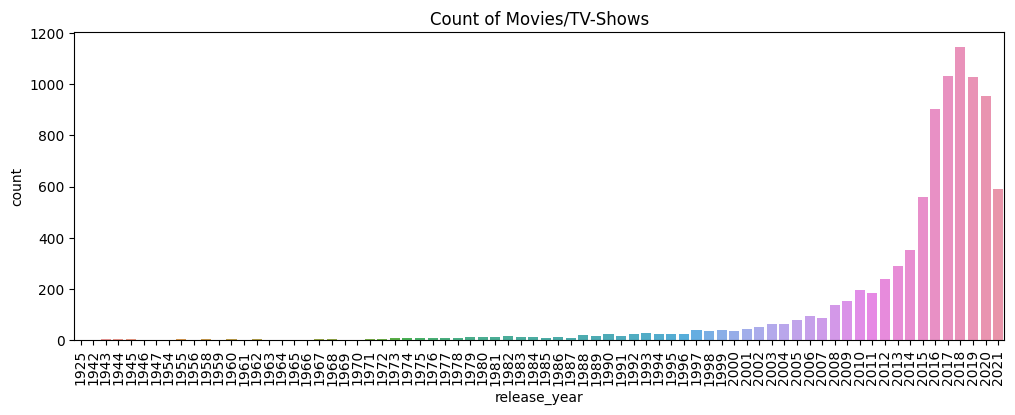

In [72]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='release_year')
plt.xticks(rotation=90)
plt.title('Count of Movies/TV-Shows')
plt.show()

### Problem 6: Ratings achieved by Movie/TV-Shows

In [73]:
df['rating'].value_counts().head()

rating
TV-MA    3214
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: count, dtype: int64

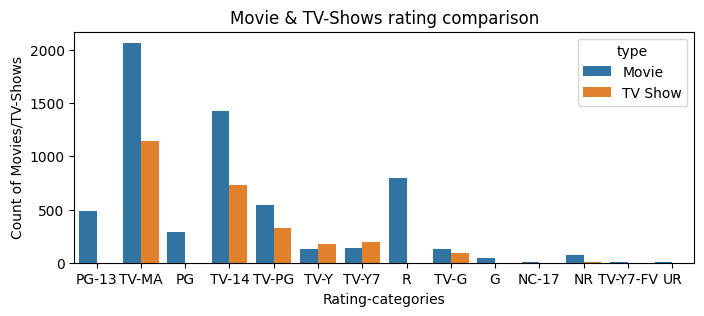

In [74]:
plt.figure(figsize=(8,3))
sns.countplot(data=df, x='rating',hue='type')
plt.xlabel('Rating-categories')
plt.ylabel('Count of Movies/TV-Shows')
plt.title('Movie & TV-Shows rating comparison')
plt.show()

**PS-6 Insights:
1. Mostly Movies and TV-Shows have been rated 'TV-MA'

### Problem 7: Top-10 Countries 

In [75]:
df_country=df.set_index('title')['country'].str.split(',', expand=True).stack().reset_index()
df_country.drop('level_1', axis=1, inplace=True)
df_country.rename({0:'Countries'}, axis=1,inplace=True)

In [76]:
df_country_excluded=df_country[~(df_country['Countries']=='Other')]

In [77]:
df_country_excluded['Countries'].value_counts().head()

Countries
United States     3211
India             1008
United Kingdom     628
 United States     479
Canada             271
Name: count, dtype: int64

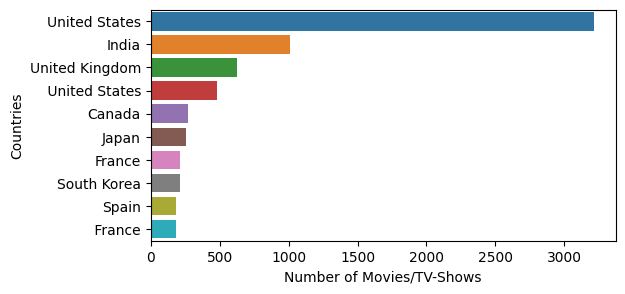

In [78]:
plt.figure(figsize=(6,3))
sns.countplot(data=df_country_excluded, y='Countries', order= df_country_excluded['Countries'].value_counts().index[0:10])
plt.ylabel('Countries')
plt.xlabel('Number of Movies/TV-Shows')
plt.show()

**PS-7 Insights:
1. Netflix has the greatest number of Movies/TV-Shows which are produced in United States.

### Problem 8: Top 10-Actors

In [79]:
df_cast=df.set_index('title')['cast'].str.split(',', expand=True).stack().reset_index()
df_cast.drop('level_1',axis=1, inplace=True)
df_cast.rename({0:'Actors'},axis=1, inplace=True)
df_cast=df_cast[~(df_cast['Actors']=='Cast-Unknown')]
df_cast['Actors'].value_counts().head(5)

Actors
 Anupam Kher         39
 Rupa Bhimani        31
 Takahiro Sakurai    30
 Julie Tejwani       28
 Om Puri             27
Name: count, dtype: int64

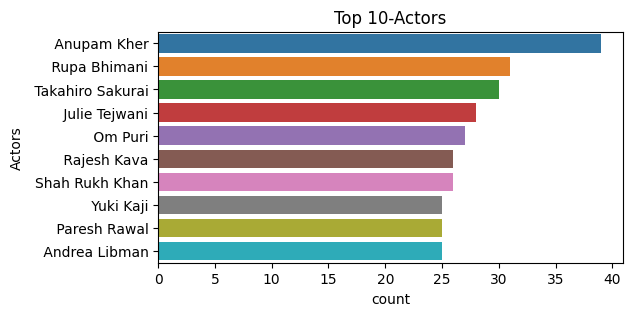

In [80]:
plt.figure(figsize=(6,3))
sns.countplot(data=df_cast, y='Actors', order=df_cast['Actors'].value_counts().index[0:10])
plt.title('Top 10-Actors')
plt.show()

**PS-8 Insights:
1. Anupam Kher is the most popular actor on Netflix.
2. Rupa Bhimani, Takahiro Sakurai, Julie Tejwani, Om Puri are other famour actors on Netflix.

### Problem Statement 9: Analysing Movies/TV-Shows added on Netflix

Text(0.5, 1.0, 'Number of movies added on Netflix through years')

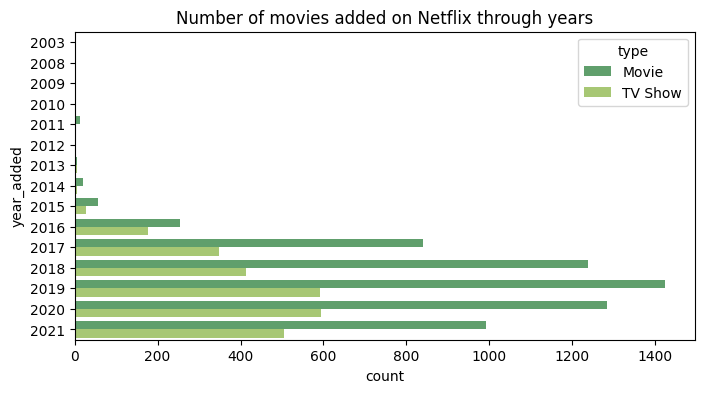

In [81]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, y='year_added', hue='type', palette='summer')
plt.title('Number of movies added on Netflix through years')

**PS-11 Insights:
1. Maximum number of Movies are added on Netflix in 2019.
2. Maximum number of TV-Shows are added on Netflix in 2020.
3. Netflix started adding adding Movie and TV-Shows from 2015 and after 2017 the rate of adding suddenly increased a lot and started decreasing after 2019.

# Extracting Movies and TV SHOWS Separately

**Creating df_movies dataframe containing only movies data

In [82]:
df_movies=df.loc[df['type']=='Movie']

**Creating df_tvshows dataframe containing only TV-Shows data

In [83]:
df_tvshows=df.loc[df['type']=='TV Show']

#### Q1A: Top-10 genres-Movies

In [84]:
data_genre_movies=df_movies.set_index('title')['listed_in'].str.split(',', expand=True).stack().reset_index(drop=True)

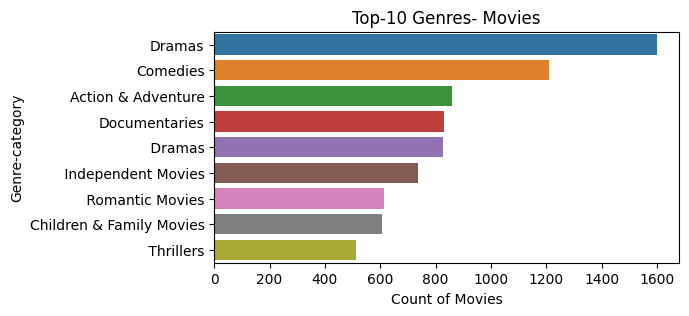

In [85]:
plt.figure(figsize=(6,3))
sns.countplot(y=data_genre_movies, order=data_genre_movies.value_counts().index[1:10])
plt.xlabel('Count of Movies')
plt.ylabel('Genre-category')
plt.title('Top-10 Genres- Movies')
plt.show()

**Insight:
1. Netflix has most number of Movies with 'Dramas' genre.

#### Q1A: Top-10 genres-TV-Shows

In [86]:
data_genre_tvshows=df_tvshows.set_index('title')['listed_in'].str.split(',', expand=True).stack().reset_index(drop=True)

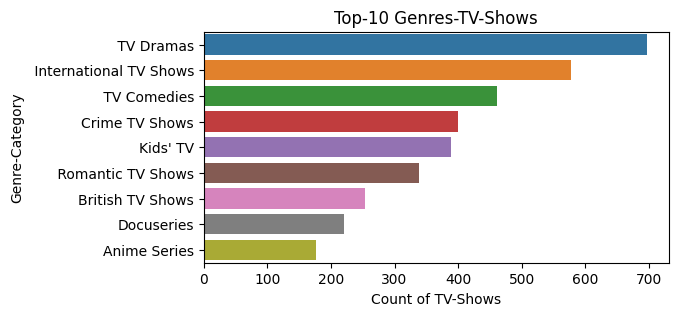

In [87]:
plt.figure(figsize=(6,3))
sns.countplot(y=data_genre_tvshows, order=data_genre_tvshows.value_counts().index[1:10])
plt.xlabel('Count of TV-Shows')
plt.ylabel('Genre-Category')
plt.title('Top-10 Genres-TV-Shows')
plt.show()

**Insight:
1. Netflix has most number of TV-Shows with 'TV-Dramas' genre.

#### Q2A: Top-10 directors in Category-Movies

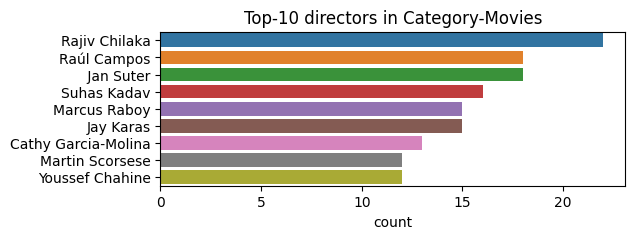

In [88]:
data_directors_movies=df_movies.set_index('title')['director'].str.split(',',expand=True).stack().reset_index(drop=True)
plt.figure(figsize=(6,2))
sns.countplot(y=data_directors_movies, order=data_directors_movies.value_counts().index[1:10])
plt.title('Top-10 directors in Category-Movies')
plt.show()

**Insight:
1. Netflix has most number of movies directed by Rajiv Chilaka.

#### Q2B: Top-10 directors in Category-TV-Shows

In [89]:
data_directors_tvshows=df_tvshows.set_index('title')['director'].str.split(',',expand=True).stack().reset_index()
data_directors_tvshows.drop('level_1', axis=1, inplace=True)
data_directors_tvshows.rename({0:'director'}, axis=1, inplace=True)
data_directors_tvshows=data_directors_tvshows[~(data_directors_tvshows['director']=='Unknown')]

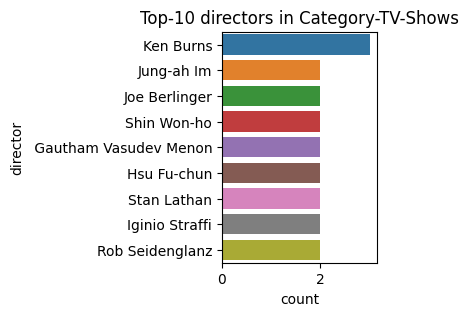

In [90]:
plt.figure(figsize=(2,3))
sns.countplot(y=data_directors_tvshows['director'], order=data_directors_tvshows['director'].value_counts().index[1:10])
plt.title('Top-10 directors in Category-TV-Shows')
plt.show()

**Insight:
1. Mostly TV-Shows present on Netflix are directed by multiple directors except Ken Burns who directed two TV-Shows alone.

#### Q3A: Count of Movies duration-wise

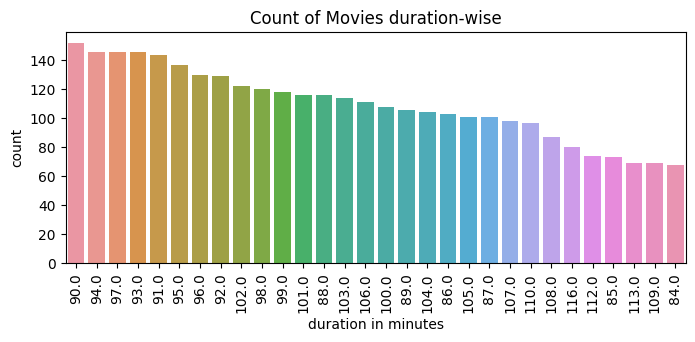

In [91]:
plt.figure(figsize=(8,3))
sns.countplot(data=df_movies,x='duration', order=df_movies['duration'].value_counts().index[:30])
plt.xticks(rotation=90)
plt.xlabel('duration in minutes')
plt.title('Count of Movies duration-wise')
plt.show()

In [92]:
#longest Movie
longest_movie=df_movies.sort_values(by='duration', ascending=False).head(1)
print(longest_movie[['title','duration']])

                           title  duration
4253  Black Mirror: Bandersnatch     312.0


In [93]:
#Shortest Movie
shortest_movie= df_movies.sort_values(by='duration').head(1)
print(shortest_movie[['title','duration']])

       title  duration
3777  Silent       3.0


**Insight:
1. Netflix has most number(152 Movies) of movies having duration 90 minutes.
2. Black Mirror: Bnadersnatch' is the longest Movie on Netflix having duration of 312 min.
3. 'Silent' is the shortest Movie on Netflix having duration of 3 min.

#### Q3B: Count of TV-Shows seasons-wise

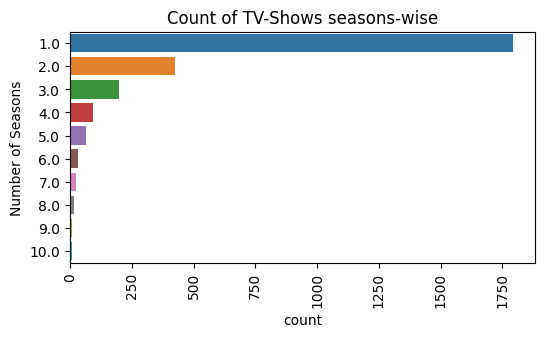

In [94]:
plt.figure(figsize=(6,3))
sns.countplot(data=df_tvshows,y='duration', order=df_tvshows['duration'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.ylabel('Number of Seasons')
plt.title('Count of TV-Shows seasons-wise')
plt.show()

In [95]:
df_tvshows['duration'].value_counts().head(2)

duration
1.0    1793
2.0     425
Name: count, dtype: int64

In [96]:
#Shortest TV-Shows
shortest_tvshows= df_tvshows.sort_values(by='duration').head()
print(shortest_tvshows[['title','duration']])

                                         title  duration
3695                          Rabbids Invasion       1.0
3515                        Surviving R. Kelly       1.0
3510                  When the Camellia Blooms       1.0
3506                          The Hockey Girls       1.0
3505  Inside Bill's Brain: Decoding Bill Gates       1.0


In [97]:
#longest TV-Shows
longest_tvshows=df_tvshows.sort_values(by='duration', ascending=False).head(1)
print(longest_tvshows[['title','duration']])

              title  duration
548  Grey's Anatomy      17.0


**Insights:
1. 1793 TV-Shows has only 1 season.
2. Grey Anatomy' is the longest TV-Show which has 17 seasons.

#### Q4A: Count of Movies released in last 30 years

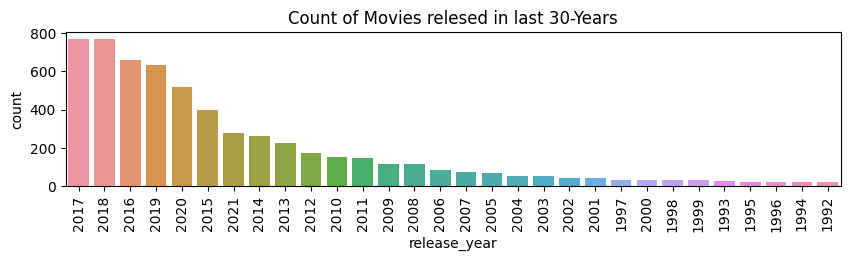

In [98]:
plt.figure(figsize=(10,2))
sns.countplot(data=df_movies, x='release_year', order= df_movies['release_year'].value_counts().index[:30])
plt.xticks(rotation=90)
plt.title('Count of Movies relesed in last 30-Years')
plt.show()

**Insights: 1.Maximum number of Movies released in 2018

#### Q4B: Count of TV-Shows released in last 30 years

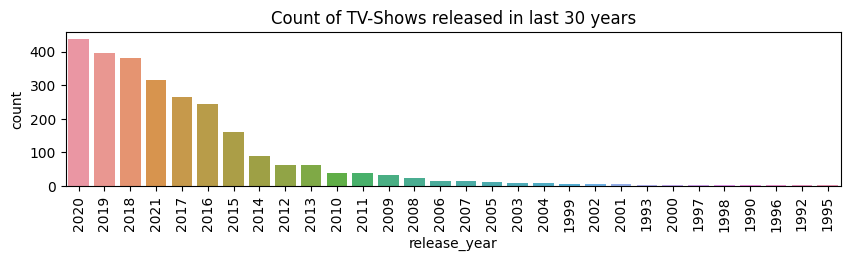

In [99]:
plt.figure(figsize=(10,2))
sns.countplot(data=df_tvshows, x='release_year', order= df_tvshows['release_year'].value_counts().index[:30])
plt.xticks(rotation=90)
plt.title('Count of TV-Shows released in last 30 years')
plt.show()

**Insights: 1.Maximum number of TV=-Shows released in 2020

#### 5A. Exploring Outliers in Netflix-Movies

<Axes: xlabel='year_added'>

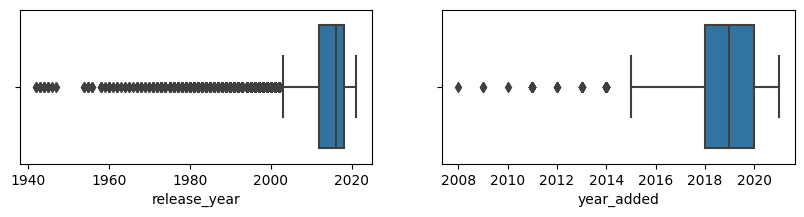

In [100]:
plt.figure(figsize=(10,2))

plt.subplot(1,2,1)
sns.boxplot(data=df_movies, x='release_year')

plt.subplot(1,2,2)
sns.boxplot(data=df_movies, x='year_added')

**Insights:
1. Movies released before 2000 can be considered as outliers.
2. Movies added before 2014 can be considered as outliers.

#### 5B. Exploring Outliers in Netflix-TV-Shows

<Axes: xlabel='year_added'>

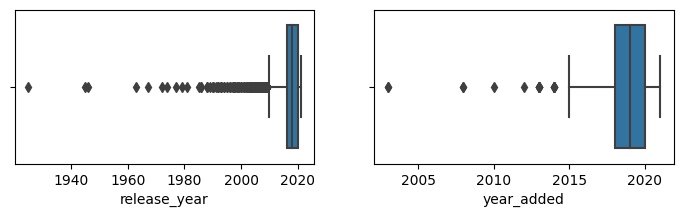

In [101]:
plt.figure(figsize=(8.5,2))

plt.subplot(1,2,1)
sns.boxplot(data=df_tvshows, x='release_year')

plt.subplot(1,2,2)
sns.boxplot(data=df_tvshows, x='year_added')

**Insights:
1. TV-Shows released before 2000 can be considered as outliers.
2. TV-Shows added before 2015 can be considered as outliers.

#### 6A: Top 10-Cast-Movies

In [102]:
df_movies_cast=df_movies.set_index('title')['cast'].str.split(',', expand=True).stack().reset_index()
df_movies_cast.drop('level_1', axis=1, inplace=True)
df_movies_cast.rename({0:'Actors'}, axis=1, inplace=True)
df_movies_cast=df_movies_cast[~(df_movies_cast['Actors']=='Cast-Unknown')]
df_movies_cast['Actors'].value_counts().head()

Actors
 Anupam Kher      38
 Rupa Bhimani     27
 Om Puri          27
Shah Rukh Khan    26
 Boman Irani      25
Name: count, dtype: int64

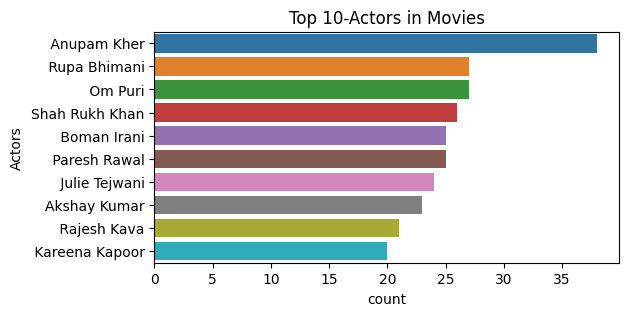

In [103]:
plt.figure(figsize=(6,3))
sns.countplot(data=df_movies_cast, y='Actors', order=df_movies_cast['Actors'].value_counts().index[0:10])
plt.title('Top 10-Actors in Movies')
plt.show()

Insight:
1. Anupam Kher is the most popular actor in Netflix Movies
2. Other famours actors Rupa Bhimani, Om Puri, SRK & Boman Irani in Netflix Movies.
3. Mostly Indian actors are famous in Netflix Movies.

#### 7B: Top 10-Cast-TV-Shows

In [104]:
df_tvshows_cast=df_tvshows.set_index('title')['cast'].str.split(',', expand=True).stack().reset_index()
df_tvshows_cast.drop('level_1', axis=1, inplace=True)
df_tvshows_cast.rename({0:'Actors'}, axis=1, inplace=True)
df_tvshows_cast=df_tvshows_cast[~(df_tvshows_cast['Actors']=='Cast-Unknown')]
df_tvshows_cast['Actors'].value_counts().head()

Actors
 Takahiro Sakurai    24
 Yuki Kaji           17
 Junichi Suwabe      17
 Ai Kayano           17
 Daisuke Ono         14
Name: count, dtype: int64

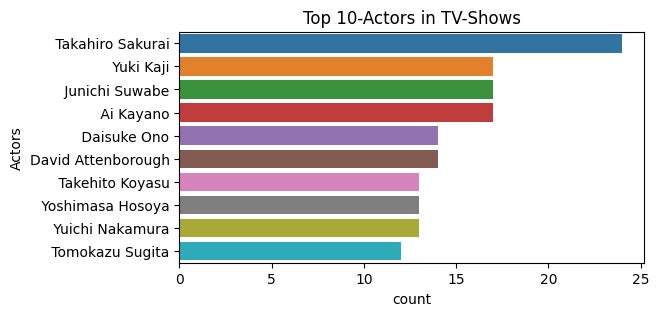

In [105]:
plt.figure(figsize=(6,3))
sns.countplot(data=df_tvshows_cast, y='Actors', order=df_tvshows_cast['Actors'].value_counts().index[0:10])
plt.title('Top 10-Actors in TV-Shows')
plt.show()

Insight: 
1. Takahiro Sakurai is the most famous actors in Netflix TV-Shows.

### Problem 8: Correlation Heatmap between 'release_year' and 'year_added', 'duration'

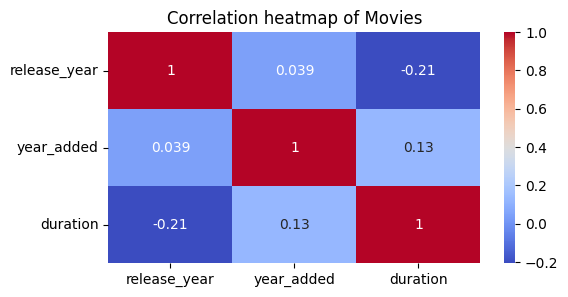

In [106]:
plt.figure(figsize=(6,3))
corr_matrix=df_movies[['release_year','year_added','duration']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap of Movies')
plt.show()

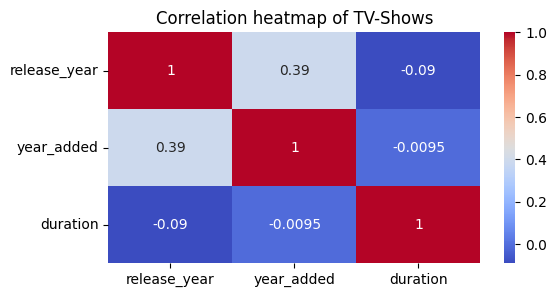

In [107]:
plt.figure(figsize=(6,3))
corr_matrix=df_tvshows[['release_year','year_added','duration']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap of TV-Shows')
plt.show()

### Problem 9: Pairplot to visualise relationship between 'release_year' ,'year_added', 'duration'

<Figure size 200x800 with 0 Axes>

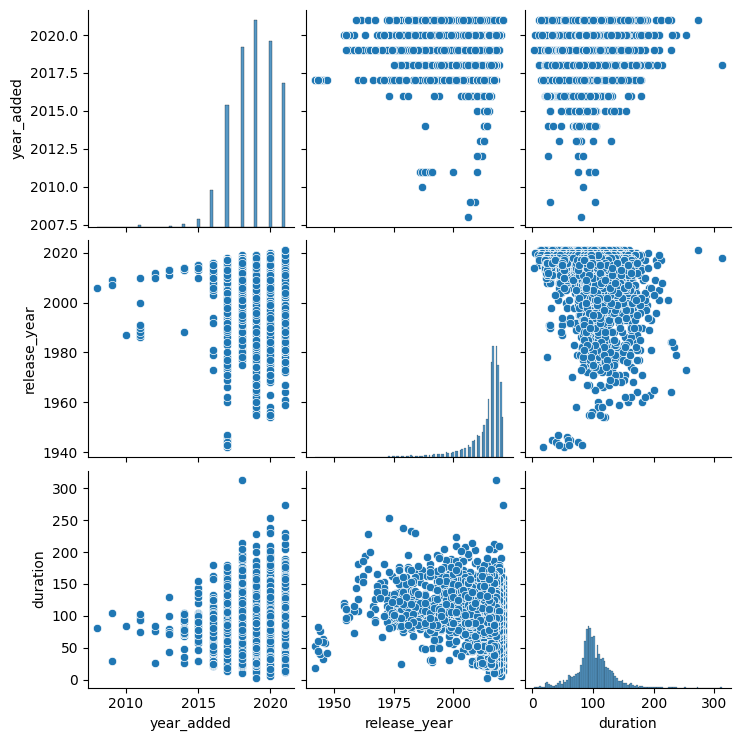

In [108]:
plt.figure(figsize=(2,8))
sns.pairplot(df_movies, vars=['year_added','release_year','duration'], kind='scatter')
plt.show()

<Figure size 200x800 with 0 Axes>

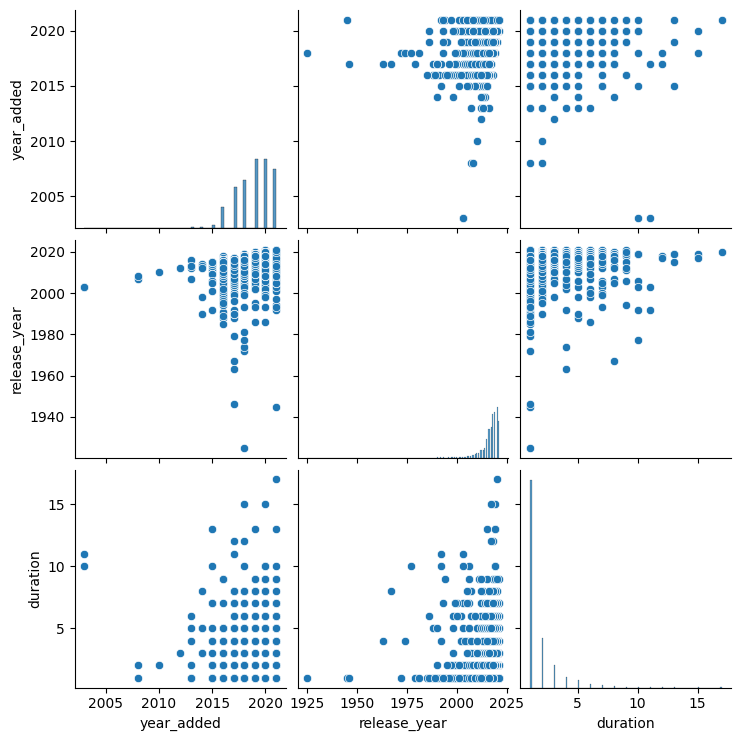

In [109]:
plt.figure(figsize=(2,8))
sns.pairplot(df_tvshows, vars=['year_added','release_year','duration'], kind='scatter')
plt.show()

Insight: 
1. Mostly Movies/TV-Shows are added during 2015-2020 which were released during 2015-2020.
2. There are strong correlation between the year_added and release_year of Movie/TV-Shows on Netflix.

### Exploring United States
**Since United States has maximum number of TV-Shows/Movies.
**Lets explore United States

In [110]:
df_2=df.copy()

In [111]:
df_2['country']=df_2['country'].str.split(',')
df_2['listed_in']=df_2['listed_in'].str.split(',')
df_2['cast']=df_2['cast'].str.split(',')
df_2['director']=df_2['director'].str.split(',')

In [112]:
df_country_genre=df_2.explode('country').explode('listed_in')

In [113]:
df_usa_genre=df_country_genre.loc[df_country_genre['country']=='United States']

#### Que: Top-5 genres in U.S.

In [114]:
top_5_genre_usa=df_usa_genre['listed_in'].value_counts()
top_5_genre_usa.head()

listed_in
Documentaries               429
Dramas                      429
Comedies                    374
Action & Adventure          323
Children & Family Movies    320
Name: count, dtype: int64

#### Que: Top-5 directors in US?

In [115]:
df_country_director=df_country_genre=df_2.explode('country').explode('director')
df_usa_director=df_country_director.loc[df_country_director['country']=='United States']

In [116]:
df_usa_director['director'].value_counts().iloc[1:6]

director
Jay Karas           15
Marcus Raboy        15
Jay Chapman         12
Steven Spielberg    11
Martin Scorsese     10
Name: count, dtype: int64

#### Que: Top-5 Actors in US?

In [117]:
df_country_cast=df_country_genre=df_2.explode('country').explode('cast')
df_usa_cast=df_country_cast.loc[df_country_cast['country']=='United States']

In [118]:
df_usa_cast['cast'].value_counts().iloc[1:6]

cast
Adam Sandler          20
 Fred Tatasciore      18
 Molly Shannon        15
 Samuel L. Jackson    14
Nicolas Cage          14
Name: count, dtype: int64

#### Que: Movies vs TV-Show comaprison in US

In [119]:
df_3=df.copy()
df_country=df_3.explode('country')
df_country_us=df_country.loc[df_country['country']=='United States']

In [120]:
df_country_us['type'].value_counts()

type
Movie      2058
TV Show     760
Name: count, dtype: int64

#### Que: Number of movies/TV-Shows released during last-5 years in US

In [121]:
df_country_us['release_year'].value_counts().sort_index(ascending=False).head()

release_year
2021    138
2020    336
2019    351
2018    356
2017    352
Name: count, dtype: int64

#### Que: Number of movies/TV-Shows added on Netflix in last 5 years in US

In [122]:
df_country_us['year_added'].value_counts().sort_index(ascending=False).head()

year_added
2021    448
2020    624
2019    677
2018    452
2017    362
Name: count, dtype: int64

## Business Insights:
1. Netflix focusses on genres containing ‘International Movies’, ‘Dramas’, ‘Comedies’ on overall. However, in Movies category ‘Dramas’ where as in TV-Shows category ‘TV-Dramas’ is most famous genres respectively.

2. Netflix has more focus on Movies as compared to TV-Shows.

3. Netflix Platform has maximum number of Movies & TV-Shows which were released in 2018 and 2020 respectively.

4. Maximum number of Movies and TV-Shows are added on Netflix in 2019 and 2020 respectively.

5. Netflix has more focus on adding the movies/TV-Shows which are released during 2020-2021. It has focus on adding the latest released movies.

6. Netflix has the greatest number of Movies/TV-Shows which are produced in United States.

7. Under Movies category, Rajiv Chilaka is the most famous director. However, TV-Shows present on Netflix are directed by multiple directors except Ken Burns who directed two TV-Shows alone.

8. Mostly Netflix containing Movies and TV-Shows have been rated as 'TV-MA'

9. Anupam Kher is the most popular actor whereas Rupa Bhimani, Takahiro Sakurai, Julie Tejwani, Om Puri have significant contribution in Netflix Movies category. However, in Netflix TV-Shows Takahiro Sakurai is the most famous actor.

10. Maximum number of Movies are having duration of 90 minutes (i.e., 152 Movies)

11. Maximum number of TV-Shows are of single season only (1793 TV-Shows).

12. 'Black Mirror: Bnadersnatch' is the longest Movie on Netflix having duration of 312 minutes. 'Silent' is the shortest Movie on Netflix having duration of 3 min.
13. **Grey Anatomy' is the longest TV-Show which has 17 seasons.

14. Netflix-Movies & TV-Shows released before 2000 may be considered as outliers.

## Recommendations:
1. Major Market of Netflix is USA, India & U.K. Thus Netflix need to add more number of Movies/TV-Shows which are produced in other countries as well.
2. There is requirements of adding more number of TV-Shows.
3. Netflix should focus on adding content having 'Dramas' Genre as it is quite famous on Netflix.
4. Mostly netflix focusssed on adding movies released after 2000. Thus there is need to add some great old movies having higher IMDB ratings.
5. Maximum number of TV-Shows added on Netflix are of single season. Thus in order to attract more number of users netflix must focus on adding TV-Shows having more than 2 seasons.
6. Netflix focusses more on movies released during 2020-2021. Thus there is requirements of adding some older movies also.
